In [96]:
import torch
import torchvision.transforms as transforms
from torch.autograd import Variable
from torchvision.models.detection import ssdlite320_mobilenet_v3_large
import cv2
import numpy as np

In [97]:
from torchvision.models import detection

# set the device we will be using to run the model
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# load the list of categories in the COCO dataset and then generate a
# set of bounding box colors for each class
# CLASSES = pickle.loads(open(args["labels"], "rb").read())
# COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

# initialize a dictionary containing model name and its corresponding 
# torchvision function call
MODELS = {
	"frcnn-resnet": detection.fasterrcnn_resnet50_fpn,
	"frcnn-mobilenet": detection.fasterrcnn_mobilenet_v3_large_320_fpn,
	"retinanet": detection.retinanet_resnet50_fpn
}
# load the model and set it to evaluation mode
model = MODELS["retinanet"](pretrained=True, progress=True, pretrained_backbone=True).to(DEVICE)
model.eval()

# load the image from disk
image = cv2.imread("./images/12.jpg")
orig = image.copy()
# convert the image from BGR to RGB channel ordering and change the
# image from channels last to channels first ordering
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.transpose((2, 0, 1))
# add the batch dimension, scale the raw pixel intensities to the
# range [0, 1], and convert the image to a floating point tensor
image = np.expand_dims(image, axis=0)
image = image / 255.0
image = torch.FloatTensor(image)
# send the input to the device and pass the it through the network to
# get the detections and predictions
image = image.to(DEVICE)
detections = model(image)[0]

c:\Users\salman\OneDrive\Desktop\SEM7\Project-2\Face_Detection\env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\salman\OneDrive\Desktop\SEM7\Project-2\Face_Detection\env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights_backbone' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights_backbone=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights_backbone=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/retin

In [98]:
# loop over the detections
for i in range(0, len(detections["boxes"])):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections["scores"][i]
	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > 0.1:
		# extract the index of the class label from the detections,
		# then compute the (x, y)-coordinates of the bounding box
		# for the object
		# idx = int(detections["labels"][i])
		box = detections["boxes"][i].detach().cpu().numpy()
		(startX, startY, endX, endY) = box.astype("int")
		# display the prediction to our terminal
		# label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
		# print("[INFO] {}".format(label))
		# draw the bounding box and label on the image
		cv2.rectangle(orig, (startX, startY), (endX, endY),
			(0,155,255), 2)
		y = startY - 15 if startY - 15 > 15 else startY + 15
		# cv2.putText(orig, label, (startX, y),
			# cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
# show the output image
# save the output image


In [99]:
from matplotlib import pyplot as plt

%matplotlib inline

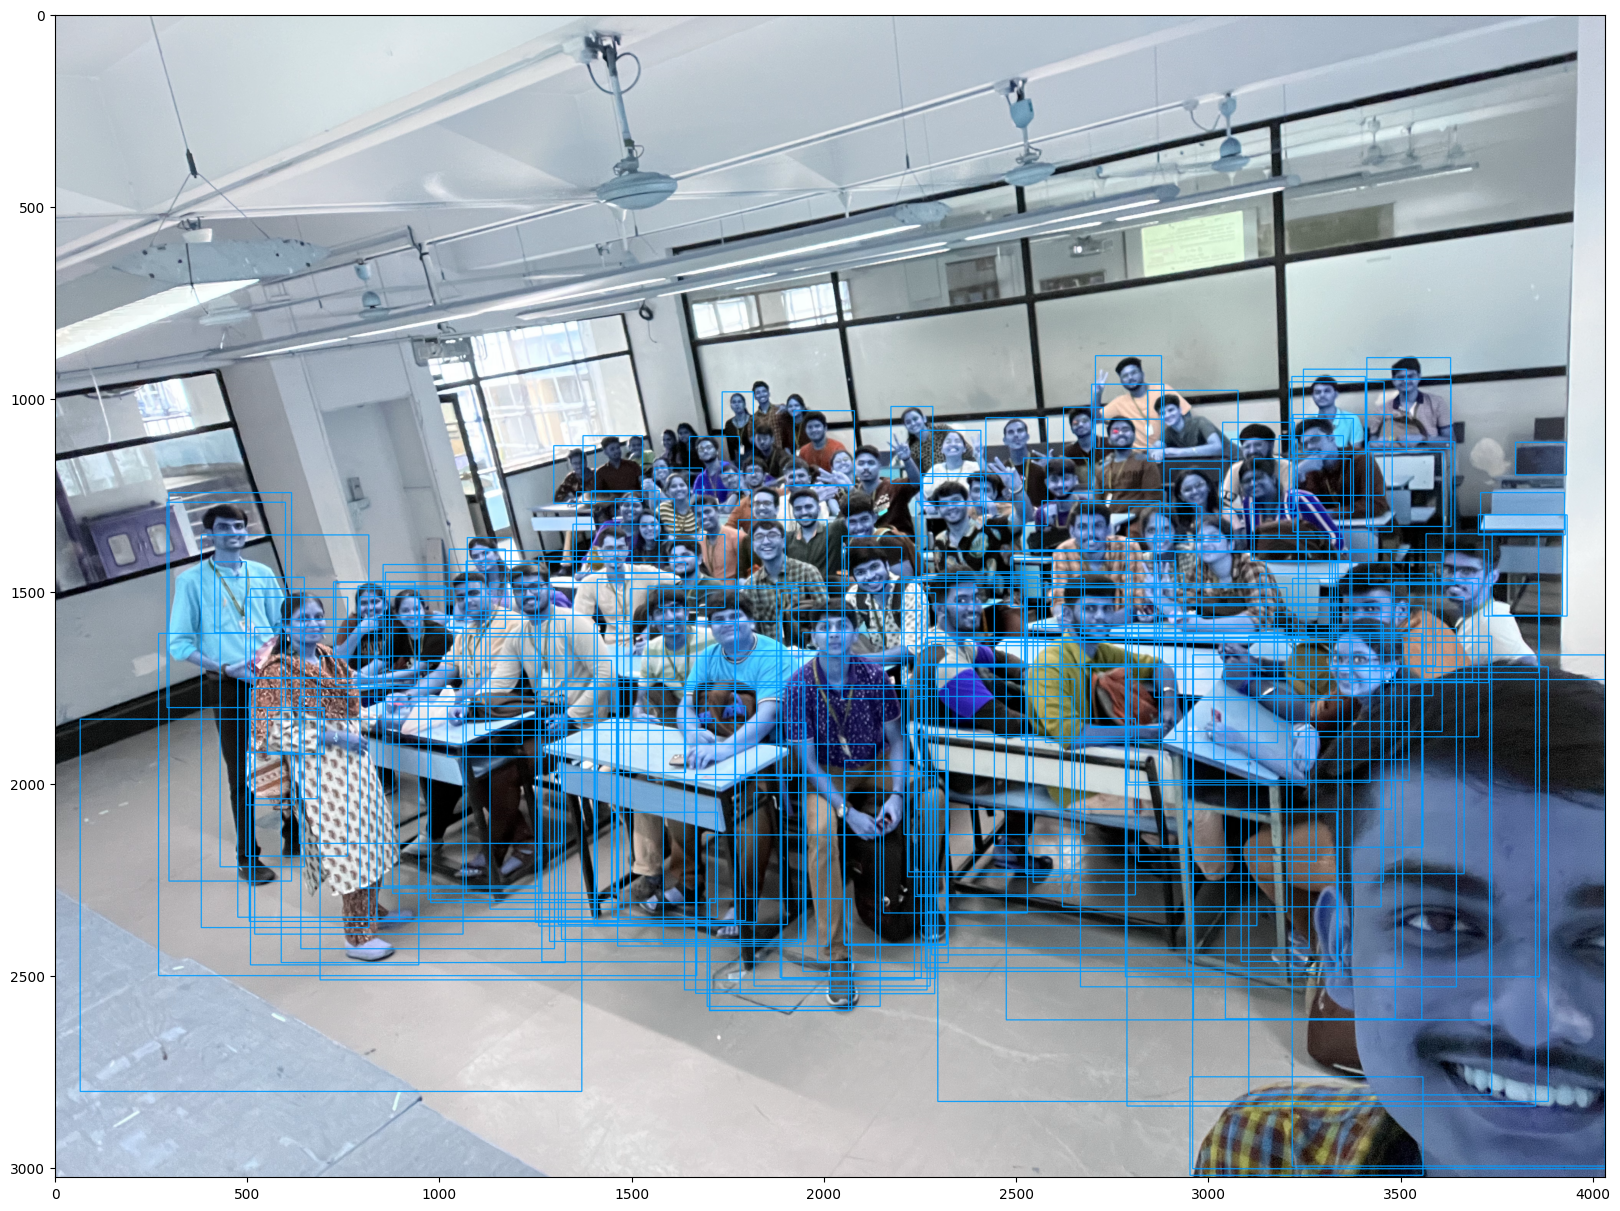

In [100]:
plt.figure(figsize=(20, 20))
plt.imshow(orig)

plt.show()

In [101]:
detections.keys()

dict_keys(['boxes', 'scores', 'labels'])